<a href="https://colab.research.google.com/github/Nsi20/SCT_DS_04/blob/main/SCT_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 4. Analyse Traffice Accident Data to Identify Patterns Related To Road Conditions, Weather and Time of Day. Visualize Accident Hotspots and Contributing Factors**

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nsidibedanielessang","key":"c5a0e8b11409037cba35d7d812a9b5a2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
path = kagglehub.dataset_download("jonbown/us-2020-traffic-accidents")
print("Path to dataset files:", path)


100%|██████████| 78.7M/78.7M [00:01<00:00, 64.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jonbown/us-2020-traffic-accidents/versions/3


In [ ]:
import os

print("Dataset directory:", path)

print("Files in dataset directory:")
print(os.listdir(path))


Dataset directory: /root/.cache/kagglehub/datasets/jonbown/us-2020-traffic-accidents/versions/3
Files in dataset directory:
['pers_16.csv', 'pers_19.csv', 'acc_19.csv', 'acc_18.csv', 'veh_18.csv', 'veh_17.csv', 'veh_19.csv', 'acc_16.csv', 'pers_20.csv', 'veh_20.csv', 'pers_18.csv', 'pers_17.csv', 'acc_17.csv', 'veh_16.csv', 'acc_20.csv']


In [ ]:
import pandas as pd
import os

file_path = os.path.join(path, "acc_20.csv")

acc_data = pd.read_csv(file_path)

print(acc_data.head())


        CASENUM  STRATUM                              STRATUMNAME  REGION  \
0  202002121240        9  Stratum 9 - LMY PV No Injuries in Crash       4   
1  202002121829        8         Stratum 8 - NLMY PV Minor Injury       3   
2  202002121849        9  Stratum 9 - LMY PV No Injuries in Crash       3   
3  202002123484       10                       Stratum 10 - Other       4   
4  202002123576       10                       Stratum 10 - Other       1   

                                          REGIONNAME  PSU    PJ  PSU_VAR  \
0  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
1  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   28  4139       28   
2  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   
3  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
4     Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)   22  4149       22   

   URBANICITY URBANICITYNAME  ...  WEATHR_IM  WEATHR_IMNAME  MAXSEV_IM  \
0     

In [ ]:
acc_files = [f for f in os.listdir(path) if f.startswith("acc_") and f.endswith(".csv")]
acc_data_list = []

for file_name in acc_files:
    file_path = os.path.join(path, file_name)
    df = pd.read_csv(file_path)
    acc_data_list.append(df)

acc_data_combined = pd.concat(acc_data_list, ignore_index=True)

print(acc_data_combined.head())


<ipython-input-8-cc6284b094bb>:6: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


        CASENUM  STRATUM                              STRATUMNAME  REGION  \
0  201901174219       10                       Stratum 10 - Other       3   
1  201901176655        6          Stratum 6 - LMY PV Minor Injury       3   
2  201901176667        8         Stratum 8 - NLMY PV Minor Injury       3   
3  201901176694        9  Stratum 9 - LMY PV No Injuries in Crash       3   
4  201901176702        6          Stratum 6 - LMY PV Minor Injury       3   

                                          REGIONNAME  PSU    PJ  PSU_VAR  \
0  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   75  4144       75   
1  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   63  4135       63   
2  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   65  4138       65   
3  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   
4  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   

   URBANICITY URBANICITYNAME  ...  WEATHR_IM  WEATHR_IMNAME  MAXSEV_IM  \
0     

In [ ]:
import pandas as pd
import os

file_path = os.path.join(path, "acc_20.csv")

acc_data = pd.read_csv(file_path)

print(acc_data.head())


        CASENUM  STRATUM                              STRATUMNAME  REGION  \
0  202002121240        9  Stratum 9 - LMY PV No Injuries in Crash       4   
1  202002121829        8         Stratum 8 - NLMY PV Minor Injury       3   
2  202002121849        9  Stratum 9 - LMY PV No Injuries in Crash       3   
3  202002123484       10                       Stratum 10 - Other       4   
4  202002123576       10                       Stratum 10 - Other       1   

                                          REGIONNAME  PSU    PJ  PSU_VAR  \
0  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
1  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   28  4139       28   
2  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   
3  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
4     Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)   22  4149       22   

   URBANICITY URBANICITYNAME  ...  WEATHR_IM  WEATHR_IMNAME  MAXSEV_IM  \
0     

In [ ]:

road_conditions = acc_data_combined.groupby('LGTCON_IMNAME').size().reset_index(name='Accident Count')

road_conditions = road_conditions.sort_values(by='Accident Count', ascending=False)

print(road_conditions)


             LGTCON_IMNAME  Accident Count
4                 Daylight           73888
0           Dark - Lighted           18628
1       Dark - Not Lighted           11482
5                     Dusk            2672
3                     Dawn            1738
2  Dark - Unknown Lighting             713
6                    Other              33


# 1. **Investigating Severity of Accidents by Road Conditions**

MAXSEV_IMNAME            Died Prior to Crash*  Fatal Injury (K)  \
LGTCON_IMNAME                                                     
Dark - Lighted                              1               535   
Dark - Not Lighted                          1               658   
Dark - Unknown Lighting                     0                18   
Dawn                                        0                44   
Daylight                                    3              1086   
Dusk                                        0                54   
Other                                       0                 1   

MAXSEV_IMNAME            Injured, Severity Unknown  No Apparent Injury (O)  \
LGTCON_IMNAME                                                                
Dark - Lighted                                  75                    7595   
Dark - Not Lighted                              39                    5427   
Dark - Unknown Lighting                          2                     397   
Dawn  

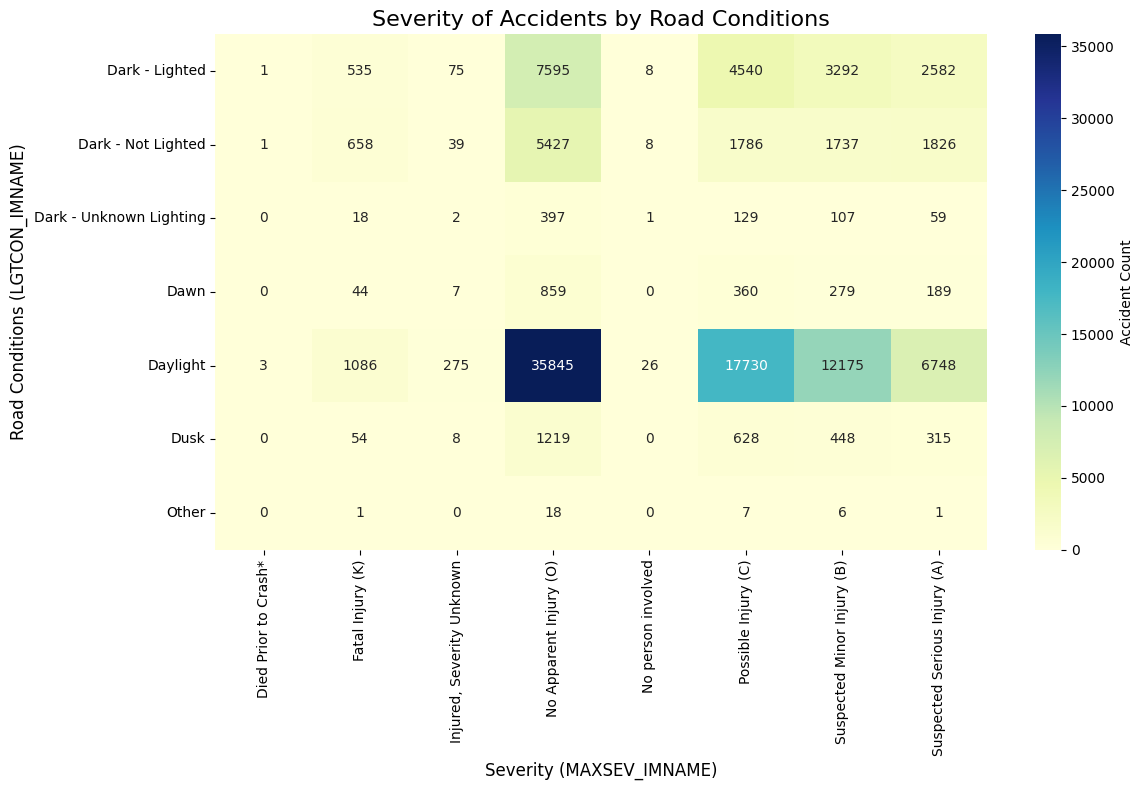

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by road conditions and severity
severity_analysis = acc_data_combined.groupby(['LGTCON_IMNAME', 'MAXSEV_IMNAME']).size().unstack(fill_value=0)

print(severity_analysis)  # Preview the data

# Visualization: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(severity_analysis, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Accident Count'})
plt.title('Severity of Accidents by Road Conditions', fontsize=16)
plt.xlabel('Severity (MAXSEV_IMNAME)', fontsize=12)
plt.ylabel('Road Conditions (LGTCON_IMNAME)', fontsize=12)
plt.tight_layout()
plt.show()


# **Task 2: Analyzing Accidents by Weather Conditions**

<ipython-input-12-9de0cab4bab5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_analysis, x='WEATHR_IMNAME', y='Accident Count', palette='viridis')


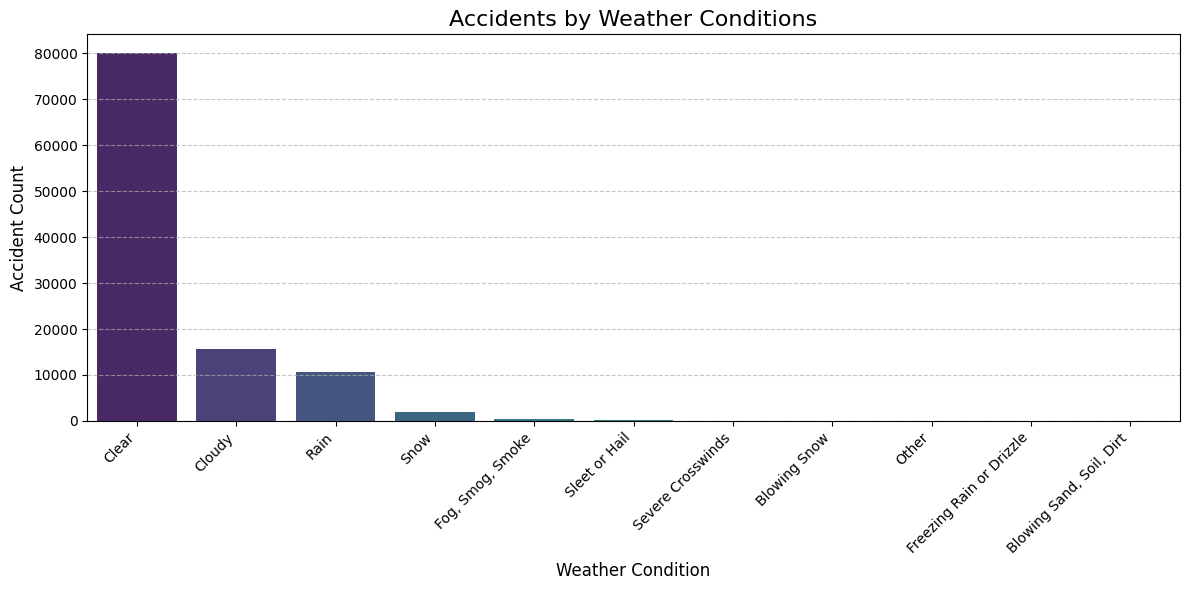

In [ ]:
# Grouping accidents by weather conditions
weather_analysis = acc_data_combined.groupby('WEATHR_IMNAME')['CASENUM'].count().reset_index()
weather_analysis = weather_analysis.rename(columns={'CASENUM': 'Accident Count'})
weather_analysis = weather_analysis.sort_values(by='Accident Count', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_analysis, x='WEATHR_IMNAME', y='Accident Count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Accidents by Weather Conditions', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# **Task 3: Analyzing Accidents by Time of Day**

  Time Period  Accident Count
0   Afternoon          109923
2     Morning           66758
1     Evening           60914
3       Night           21482


<ipython-input-13-57a968175700>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_analysis, x='Time Period', y='Accident Count', palette='coolwarm')


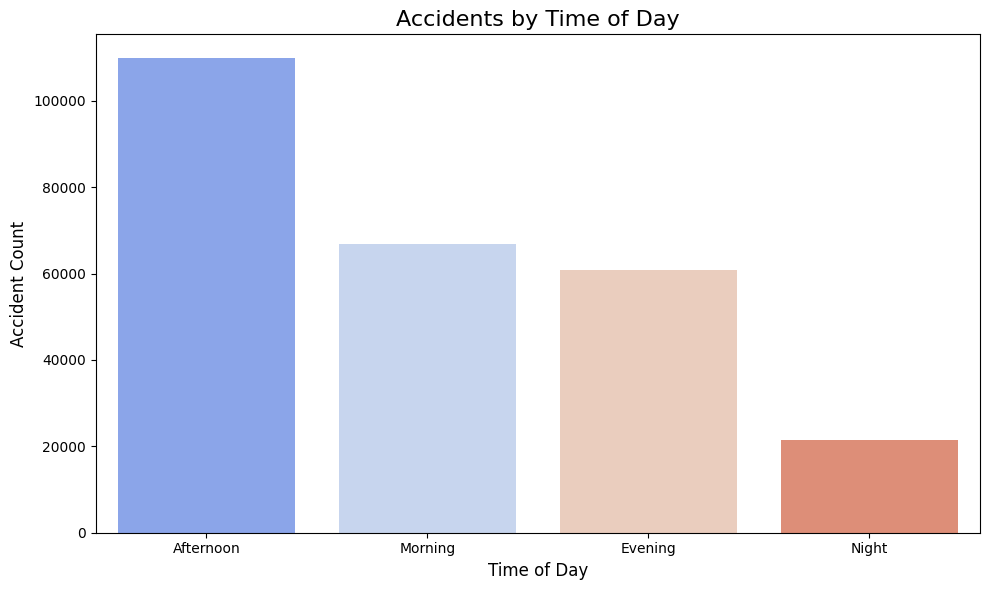

In [ ]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

acc_data_combined['Time Period'] = acc_data_combined['HOUR'].apply(categorize_time)

time_analysis = acc_data_combined.groupby('Time Period').size().reset_index(name='Accident Count')
time_analysis = time_analysis.sort_values(by='Accident Count', ascending=False)

print(time_analysis)

# Visualization: Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=time_analysis, x='Time Period', y='Accident Count', palette='coolwarm')
plt.title('Accidents by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.tight_layout()
plt.show()


# **4. Accident Hotspots by Region (Bar Chart)**

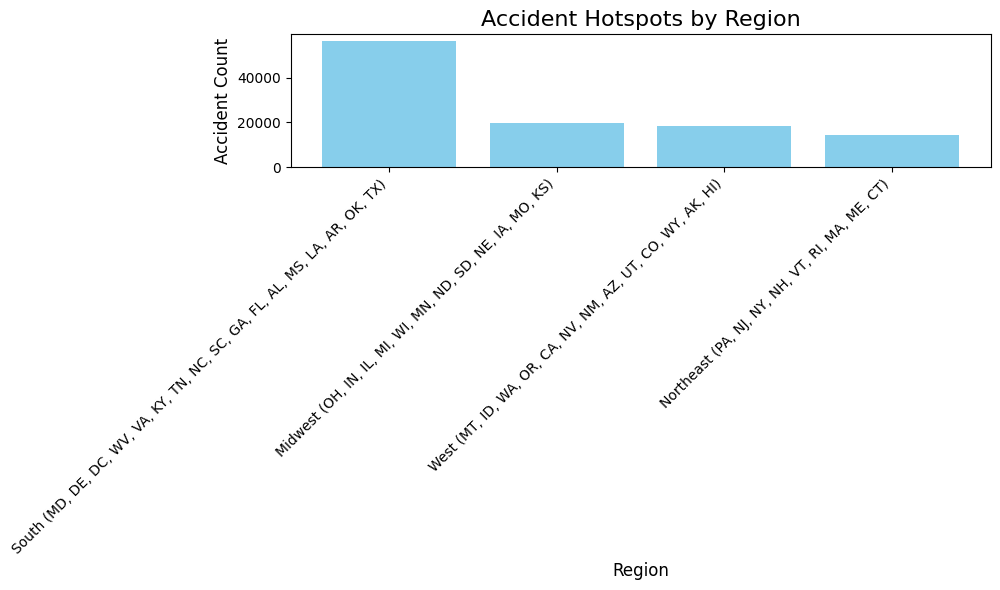

In [ ]:
import matplotlib.pyplot as plt

# Grouping accidents by region
region_hotspots = acc_data_combined.groupby('REGIONNAME')['CASENUM'].count().reset_index()
region_hotspots = region_hotspots.rename(columns={'CASENUM': 'Accident Count'})
region_hotspots = region_hotspots.sort_values(by='Accident Count', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_hotspots['REGIONNAME'], region_hotspots['Accident Count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Accident Hotspots by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.tight_layout()
plt.show()


# **5. Accident Distribution by Urbanicity (Bar Chart)**

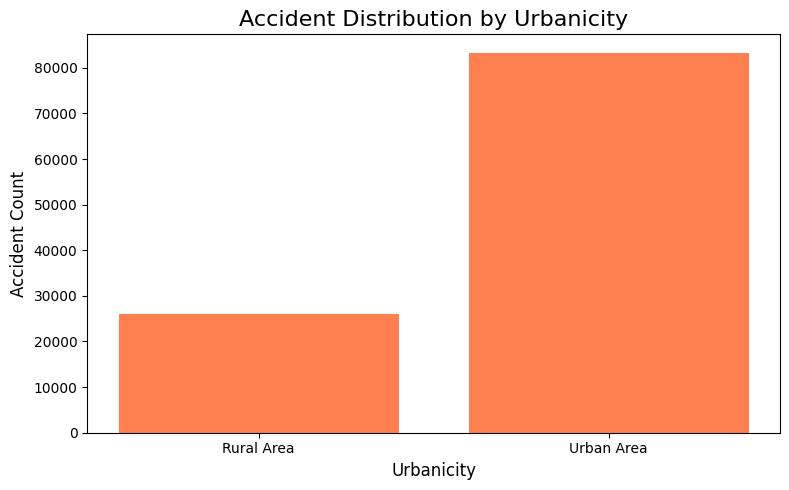

In [ ]:
# Grouping accidents by urbanicity
urbanicity_analysis = acc_data_combined.groupby('URBANICITYNAME')['CASENUM'].count().reset_index()
urbanicity_analysis = urbanicity_analysis.rename(columns={'CASENUM': 'Accident Count'})

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(urbanicity_analysis['URBANICITYNAME'], urbanicity_analysis['Accident Count'], color='coral')
plt.title('Accident Distribution by Urbanicity', fontsize=16)
plt.xlabel('Urbanicity', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.tight_layout()
plt.show()


# **6. Accident Trends by Hour (Line Chart)**

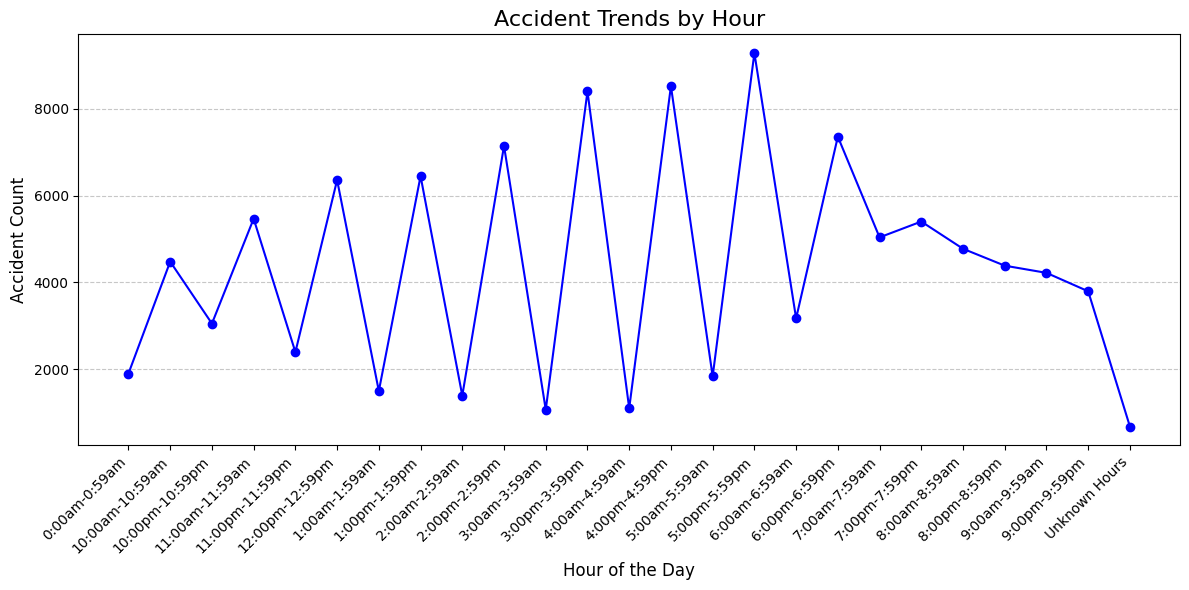

In [ ]:
# Grouping accidents by hour
hourly_accidents = acc_data_combined.groupby('HOURNAME')['CASENUM'].count().reset_index()
hourly_accidents = hourly_accidents.rename(columns={'CASENUM': 'Accident Count'})
hourly_accidents = hourly_accidents.sort_values(by='HOURNAME')

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(hourly_accidents['HOURNAME'], hourly_accidents['Accident Count'], marker='o', color='blue', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.title('Accident Trends by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-17-6fe46d86f4ab>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_analysis, x='WEATHR_IMNAME', y='Accident Count',
<ipython-input-17-6fe46d86f4ab>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
<ipython-input-17-6fe46d86f4ab>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_analysis, x='Time Period', y='Accident Count',
<ipython-input-17-6fe46d86f4ab>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a

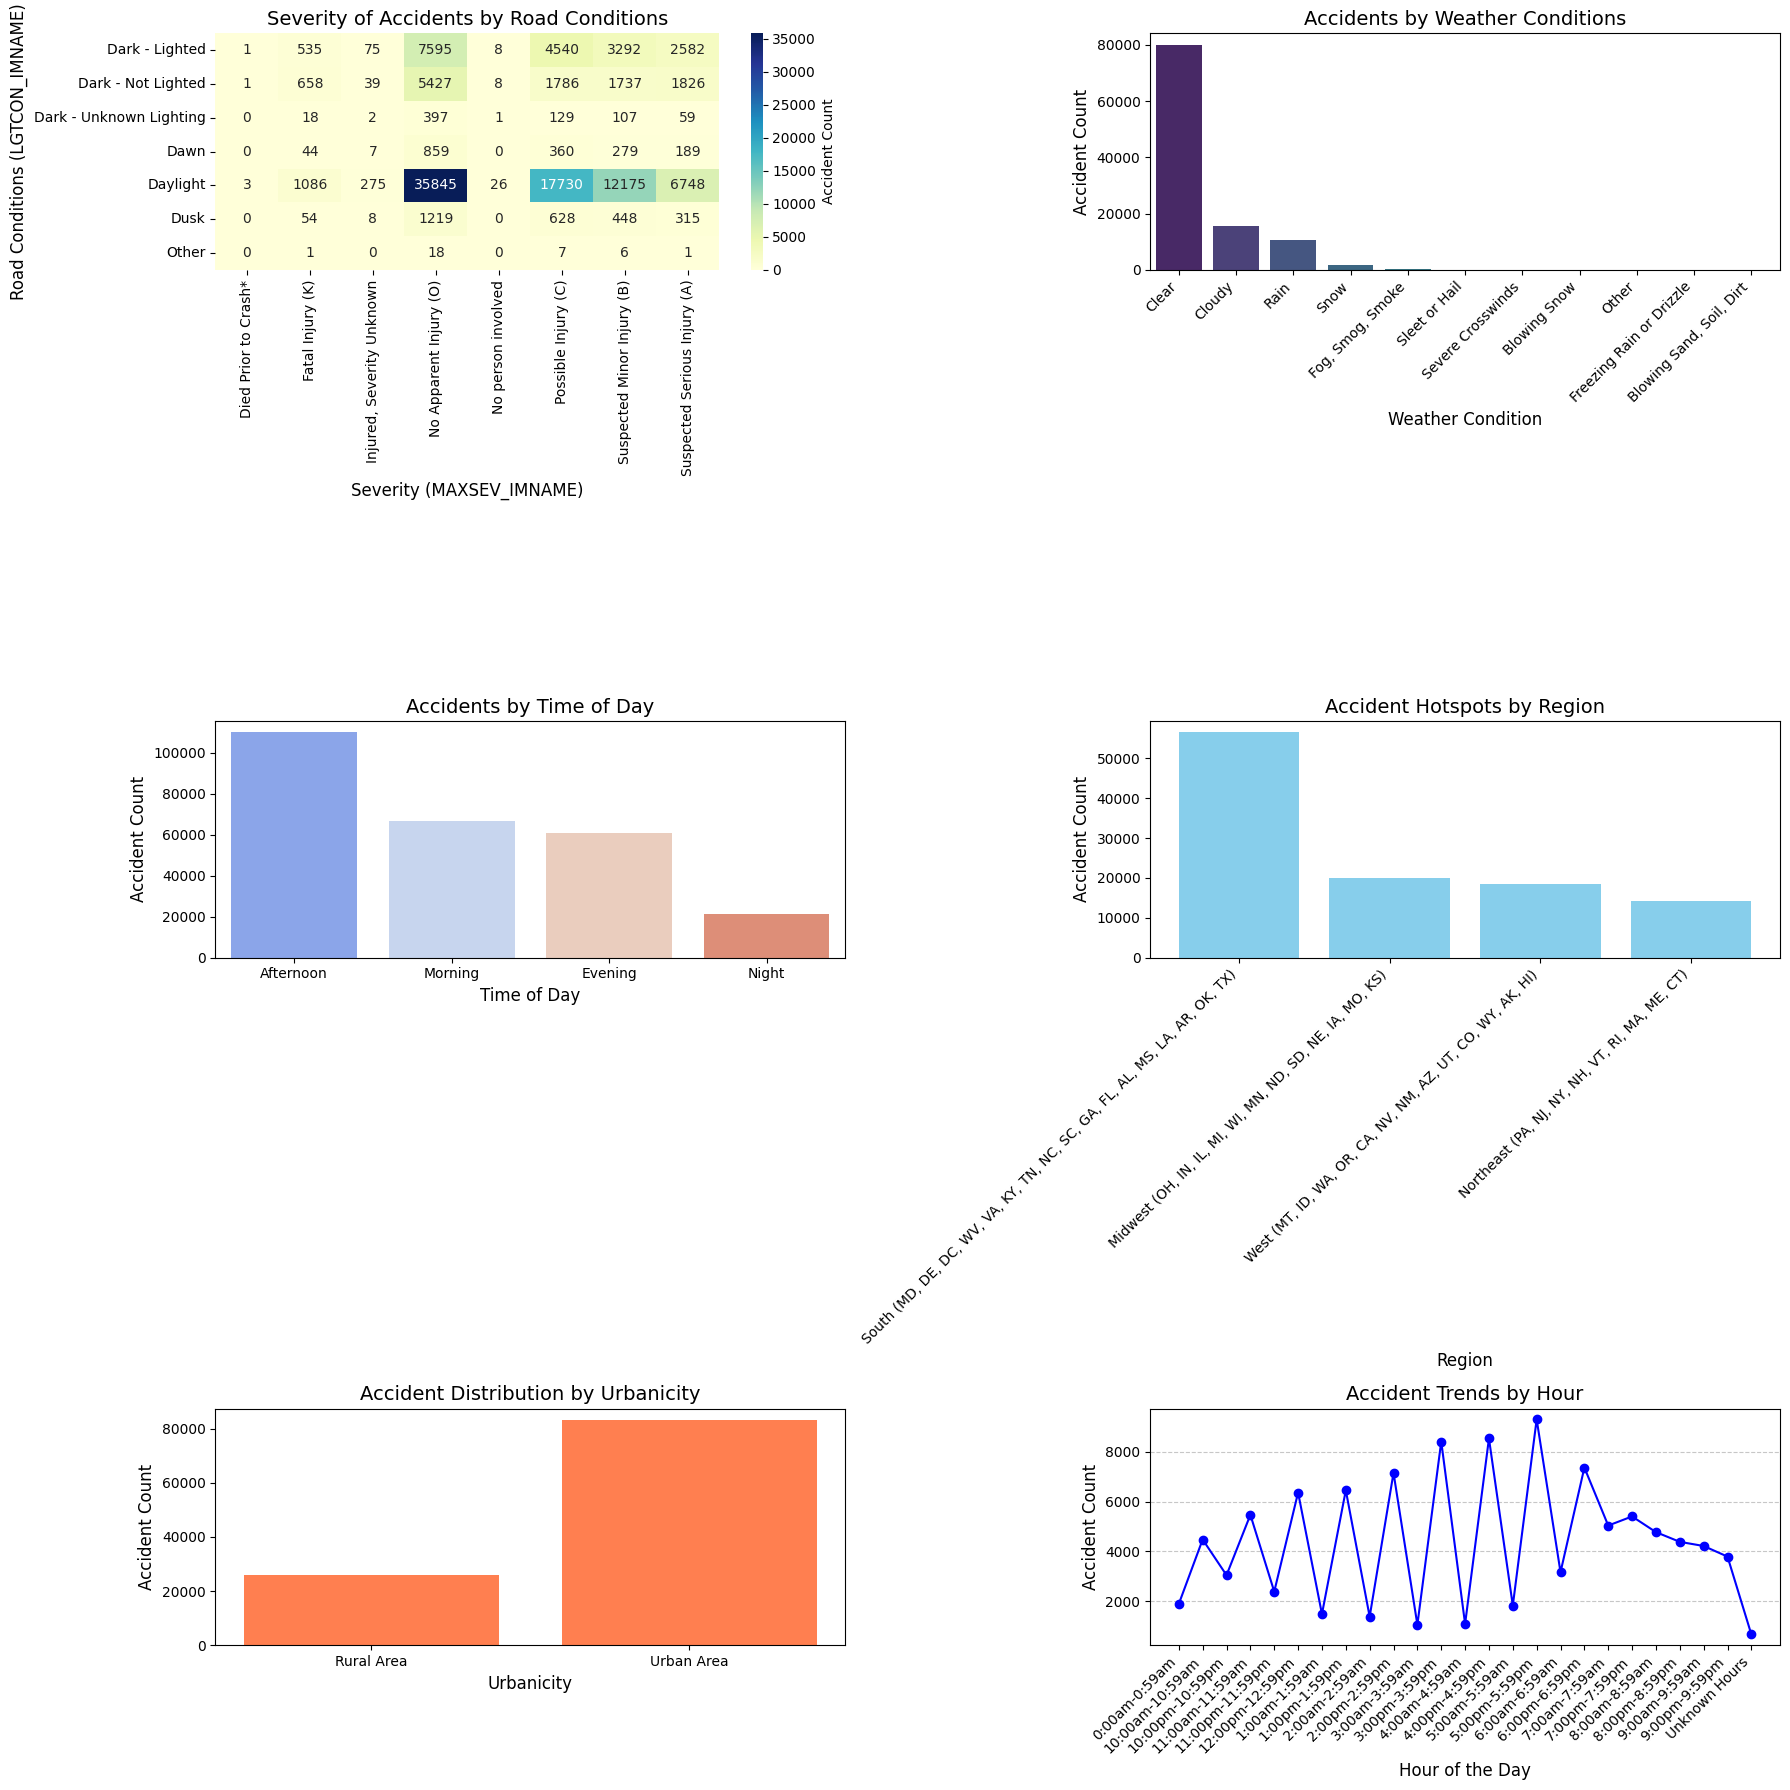

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# --- Plot 1: Severity of Accidents by Road Conditions (Heatmap) ---
sns.heatmap(severity_analysis, annot=True, fmt='d', cmap='YlGnBu',
            cbar_kws={'label': 'Accident Count'}, ax=axes[0, 0])
axes[0, 0].set_title('Severity of Accidents by Road Conditions', fontsize=14)
axes[0, 0].set_xlabel('Severity (MAXSEV_IMNAME)', fontsize=12)
axes[0, 0].set_ylabel('Road Conditions (LGTCON_IMNAME)', fontsize=12)

# --- Plot 2: Accidents by Weather Conditions (Bar Chart) ---
sns.barplot(data=weather_analysis, x='WEATHR_IMNAME', y='Accident Count',
            palette='viridis', ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].set_title('Accidents by Weather Conditions', fontsize=14)
axes[0, 1].set_xlabel('Weather Condition', fontsize=12)
axes[0, 1].set_ylabel('Accident Count', fontsize=12)

# --- Plot 3: Accidents by Time of Day (Bar Chart) ---
sns.barplot(data=time_analysis, x='Time Period', y='Accident Count',
            palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Accidents by Time of Day', fontsize=14)
axes[1, 0].set_xlabel('Time of Day', fontsize=12)
axes[1, 0].set_ylabel('Accident Count', fontsize=12)

# --- Plot 4: Accident Hotspots by Region (Bar Chart) ---
axes[1, 1].bar(region_hotspots['REGIONNAME'], region_hotspots['Accident Count'],
              color='skyblue')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_title('Accident Hotspots by Region', fontsize=14)
axes[1, 1].set_xlabel('Region', fontsize=12)
axes[1, 1].set_ylabel('Accident Count', fontsize=12)

# --- Plot 5: Accident Distribution by Urbanicity (Bar Chart) ---
axes[2, 0].bar(urbanicity_analysis['URBANICITYNAME'], urbanicity_analysis['Accident Count'],
              color='coral')
axes[2, 0].set_title('Accident Distribution by Urbanicity', fontsize=14)
axes[2, 0].set_xlabel('Urbanicity', fontsize=12)
axes[2, 0].set_ylabel('Accident Count', fontsize=12)

# --- Plot 6: Accident Trends by Hour (Line Chart) ---
axes[2, 1].plot(hourly_accidents['HOURNAME'], hourly_accidents['Accident Count'],
               marker='o', color='blue', linestyle='-')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45, ha='right')
axes[2, 1].set_title('Accident Trends by Hour', fontsize=14)
axes[2, 1].set_xlabel('Hour of the Day', fontsize=12)
axes[2, 1].set_ylabel('Accident Count', fontsize=12)
axes[2, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()